In [5]:
# Importing the standard Python packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the modules used for EMA Workbench
from ema_workbench import (RealParameter, CategoricalParameter, IntegerParameter, ema_logging, load_results, save_results)
from ema_workbench.em_framework import (get_SALib_problem)
from ema_workbench import load_results
ema_logging.log_to_stderr(ema_logging.INFO)

# Importing sobol from the SALib library
from SALib.analyze import sobol

# Importing the problem formulation function
from problem_formulation import get_model_for_problem_formulation

# Global Sensitivity Analysis: Sobol

### Sensitivity Analysis over Uncertainties

In [7]:
# Loading in the results from the experiments computed for the SA over uncertainties
results = load_results('sobol_uncertainties 3 obj 2000 scenarios.tar.gz')
experiments, outcomes = results

[MainProcess/INFO] results loaded succesfully from C:\Users\Anne Boijmans\Documents\EPA\EPA1361\UPDATE3\final assignment\sobol_uncertainties 3 obj 2000 scenarios.tar.gz


In [8]:
# Reproducing the uncertainties defined in the dike model
# It does not matter which problem formulation id is used here, since the uncertainties are the same in every PF
dike_model = get_model_for_problem_formulation(0)
uncertainties = []
for unc in dike_model.uncertainties:
    uncertainties.append(unc)

# Transferring the uncertainties to the desired SALib problem format
problem = get_SALib_problem(uncertainties)

[MainProcess/INFO] model initialized


In [9]:
# Preparing the outcomes of interest in a manner that they can be read in by Sobol
Y1 = outcomes['Expected Number of Deaths']
Y3 = outcomes['Expected Annual Damage']

In [10]:
# Setting up a function for formatting the Sobol dataframes in a way that negative (=unwanted) values turn red
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [11]:
# Executing Sobol sensitivity analysis for each uncertainty on the expected number of deaths
scores_deaths = sobol.analyze(problem, Y1, calc_second_order=True, print_to_console=True)

#Executing Sobol sensitivity analysis for each uncertainty on the expected annual amage
scores_damage = sobol.analyze(problem, Y3, calc_second_order=True, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
A.0_ID flood wave shape 0.013563 0.006077 0.010952 0.001116
A.1_Bmax 0.000000 0.000000 0.000000 0.000000
A.1_Brate 0.000000 0.000000 0.000000 0.000000
A.1_pfail 0.285597 0.030876 0.285921 0.017558
A.2_Bmax 0.000000 0.000000 0.000000 0.000000
A.2_Brate 0.000000 0.000000 0.000000 0.000000
A.2_pfail 0.028074 0.009466 0.026875 0.002260
A.3_Bmax 0.000000 0.000000 0.000000 0.000000
A.3_Brate 0.000000 0.000000 0.000000 0.000000
A.3_pfail 0.647257 0.044609 0.650177 0.041065
A.4_Bmax 0.000000 0.000000 0.000000 0.000000
A.4_Brate 0.000000 0.000000 0.000000 0.000000
A.4_pfail 0.000259 0.000953 0.000230 0.000016
A.5_Bmax 0.000000 0.000000 0.000000 0.000000
A.5_Brate 0.000000 0.000000 0.000000 0.000000
A.5_pfail 0.029165 0.012576 0.030784 0.002555
discount rate 0.000000 0.000000 0.000000 0.000000

Parameter_1 Parameter_2 S2 S2_conf
A.0_ID flood wave shape A.1_Bmax -0.008904 0.007746
A.0_ID flood wave shape A.1_Brate -0.008904 0.007746
A.0_ID flood wave shape A.1_pfai

In [13]:
# Using the scores presented above for further Sobol sensitivity analysis
# The indices, ST, ST_conf, S1 and S1_conf for each uncertainty on the expected number of deaths will be presented
sobol_stats_d = {key:scores_deaths[key] for key in ['ST', 'ST_conf', 'S1', 'S1_conf']}
sobol_stats_d = pd.DataFrame(sobol_stats_d, index=problem['names'])
sobol_stats_d = sobol_stats_d.sort_values(by='S1', ascending=False)
sobol_stats_d.style.applymap(color_negative_red)

,S1,S1_conf,ST,ST_conf
A.3_pfail,0.647257,0.0446093,0.650177,0.0410649
A.1_pfail,0.285597,0.0308762,0.285921,0.0175576
A.5_pfail,0.0291654,0.012576,0.0307837,0.00255509
A.2_pfail,0.0280738,0.00946568,0.0268751,0.00226021
A.0_ID flood wave shape,0.0135628,0.00607672,0.0109525,0.00111557
A.4_pfail,0.000259016,0.000952779,0.000230307,1.56797e-05
A.4_Bmax,0,0,0,0
A.5_Brate,0,0,0,0
A.5_Bmax,0,0,0,0
A.4_Brate,0,0,0,0


In [14]:
# Using the scores presented above for further Sobol sensitivity analysis
# The indices, ST, ST_conf, S1 and S1_conf for each uncertainty on the expected annual damage will be presented
sobol_stats_da = {key:scores_damage[key] for key in ['ST', 'ST_conf', 'S1', 'S1_conf']}
sobol_stats_da = pd.DataFrame(sobol_stats_da, index=problem['names'])
sobol_stats_da = sobol_stats_da.sort_values(by='S1', ascending=False)
sobol_stats_da.style.applymap(color_negative_red)

,S1,S1_conf,ST,ST_conf
A.1_pfail,0.597647,0.0416071,0.625995,0.0375547
A.3_pfail,0.203931,0.033748,0.216472,0.0173647
discount rate,0.098049,0.0214461,0.139482,0.0118692
A.2_pfail,0.0348592,0.0113711,0.0349961,0.00344809
A.5_pfail,0.0348385,0.0130975,0.0390776,0.0029161
A.0_ID flood wave shape,0.0094194,0.00606272,0.00790318,0.000909986
A.4_pfail,0.00106464,0.00216073,0.00116315,9.04469e-05
A.2_Brate,0,0,0,0
A.3_Bmax,0,0,0,0
A.1_Bmax,0,0,0,0


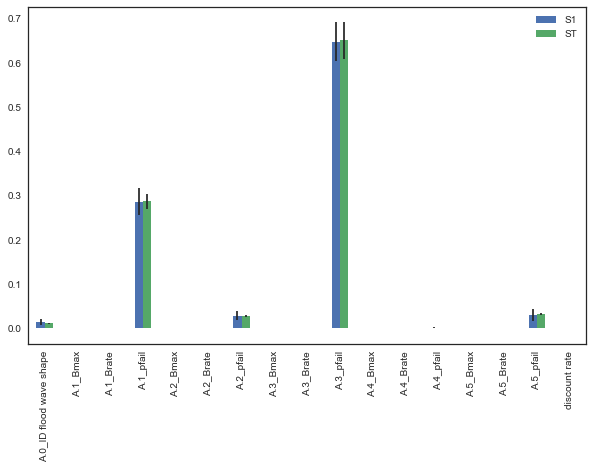

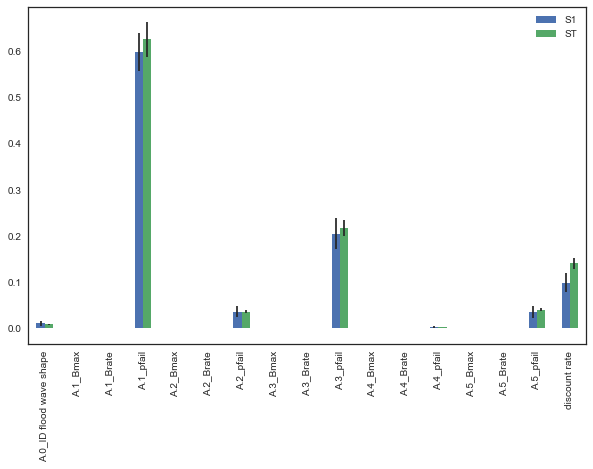

In [15]:
# Plotting the S1 and ST indices in a barplot
def plot_scores(scores):
    scores_filtered = {k:scores[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(10,6)
    fig.subplots_adjust(bottom=0.1)
    return fig

plot_scores(scores_deaths)
plot_scores(scores_damage)
plt.show()

### Sensitivity Analysis over Policy Levers

In [16]:
# Loading in the results from the experiments computer for the SA over policy levers
results = load_results('sobol_levers 3 obj 2000 policies.tar.gz')
experiments, outcomes = results

[MainProcess/INFO] results loaded succesfully from C:\Users\Anne Boijmans\Documents\EPA\EPA1361\UPDATE3\final assignment\sobol_levers 3 obj 2000 policies.tar.gz


In [26]:
# Reproducing the policy levers defined in the dike model
# It does not matter which problem formulation id is used here, since the policy levers are the same in every PF
from problem_formulation import get_model_for_problem_formulation
dike_model = get_model_for_problem_formulation(0)
levers = []
for lev in dike_model.levers:
    levers.append(lev)
    
problem = get_SALib_problem(levers)

[MainProcess/INFO] model initialized


In [27]:
# Preparing the outcomes of interest in a manner that they can be read in by Sobol
Y1 = outcomes['Expected Number of Deaths']
Y2 = outcomes['Total Investment Costs']
Y3 = outcomes['Expected Annual Damage']

In [28]:
# Executing Sobol sensitivity analysis for each uncertainty on the expected number of deaths
scores_deaths = sobol.analyze(problem, Y1, calc_second_order=True, print_to_console=True)

# Executing Sobol sensitivity analysis for each uncertainty on the total investment costs
scores_costs = sobol.analyze(problem, Y2, calc_second_order=True, print_to_console=True)

# Executing Sobol sensitivity analysis for each uncertainty on the expected annual damage
scores_damage = sobol.analyze(problem, Y3, calc_second_order=True, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
0_RfR -0.008634 0.016850 0.052244 0.025954
1_RfR -0.006183 0.015734 0.053444 0.028294
2_RfR 0.003597 0.014646 0.073173 0.019883
3_RfR 0.017044 0.014238 0.068760 0.013200
4_RfR 0.003439 0.004381 0.003007 0.001404
A.1_DikeIncrease 0.005632 0.024382 0.074068 0.031917
A.2_DikeIncrease 0.015450 0.010413 0.041075 0.008482
A.3_DikeIncrease 0.171930 0.067043 0.440354 0.081639
A.4_DikeIncrease 0.000187 0.001395 0.000768 0.000200
A.5_DikeIncrease 0.097051 0.037135 0.221232 0.045214
EWS_DaysToThreat 0.235100 0.060951 0.615068 0.086119

Parameter_1 Parameter_2 S2 S2_conf
0_RfR 1_RfR 0.008087 0.019192
0_RfR 2_RfR 0.007109 0.018826
0_RfR 3_RfR 0.010003 0.019082
0_RfR 4_RfR 0.007819 0.019213
0_RfR A.1_DikeIncrease 0.016448 0.021584
0_RfR A.2_DikeIncrease 0.008416 0.019700
0_RfR A.3_DikeIncrease 0.008178 0.018984
0_RfR A.4_DikeIncrease 0.007687 0.019193
0_RfR A.5_DikeIncrease 0.008288 0.018750
0_RfR EWS_DaysToThreat 0.000464 0.020121
1_RfR 2_RfR 0.008287 0.016474
1_RfR 

In [29]:
# Using the scores presented above for further Sobol sensitivity analysis
# The indices, ST, ST_conf, S1 and S1_conf for each policy lever on the expected number of deaths will be presented
sobol_stats_d = {key:scores_deaths[key] for key in ['ST', 'ST_conf', 'S1', 'S1_conf']}
sobol_stats_d = pd.DataFrame(sobol_stats_d, index=problem['names'])
sobol_stats_d = sobol_stats_d.sort_values(by='S1', ascending=False)
sobol_stats_d.style.applymap(color_negative_red)

,S1,S1_conf,ST,ST_conf
EWS_DaysToThreat,0.2351,0.0609513,0.615068,0.0861186
A.3_DikeIncrease,0.17193,0.0670433,0.440354,0.081639
A.5_DikeIncrease,0.0970511,0.0371351,0.221232,0.0452142
3_RfR,0.0170442,0.0142378,0.0687597,0.0132005
A.2_DikeIncrease,0.0154504,0.0104132,0.0410746,0.00848234
A.1_DikeIncrease,0.00563183,0.0243815,0.0740679,0.0319173
2_RfR,0.00359695,0.0146455,0.0731733,0.0198831
4_RfR,0.00343893,0.00438127,0.00300736,0.00140391
A.4_DikeIncrease,0.000187279,0.0013953,0.000768229,0.000199515
1_RfR,-0.0061828,0.0157344,0.0534435,0.0282936


In [30]:
# Using the scores presented above for further Sobol sensitivity analysis
# The indices, ST, ST_conf, S1 and S1_conf for each policy lever on the total investment costs of deaths will be presented
sobol_stats_c = {key:scores_costs[key] for key in ['ST', 'ST_conf', 'S1', 'S1_conf']}
sobol_stats_c = pd.DataFrame(sobol_stats_c, index=problem['names'])
sobol_stats_c = sobol_stats_c.sort_values(by='S1', ascending=False)
sobol_stats_c.style.applymap(color_negative_red)

,S1,S1_conf,ST,ST_conf
4_RfR,0.465066,0.0356888,0.470062,0.0262916
1_RfR,0.340137,0.0313043,0.339979,0.0185084
3_RfR,0.10795,0.0204154,0.105278,0.00597452
0_RfR,0.0513798,0.0137547,0.0504745,0.00301995
A.2_DikeIncrease,0.00979466,0.00540275,0.00970917,0.000778173
A.1_DikeIncrease,0.00805754,0.00590283,0.00905998,0.000716133
2_RfR,0.00683063,0.00494859,0.0067007,0.000353969
A.5_DikeIncrease,0.00405856,0.00379337,0.00327702,0.000269507
A.3_DikeIncrease,0.0018355,0.00271094,0.00185352,0.000164627
A.4_DikeIncrease,0.000524074,0.0013861,0.00042442,3.12791e-05


In [31]:
# Using the scores presented above for further Sobol sensitivity analysis
# The indices, ST, ST_conf, S1 and S1_conf for each policy lever on the expected annual damage will be presented
sobol_stats_da = {key:scores_damage[key] for key in ['ST', 'ST_conf', 'S1', 'S1_conf']}
sobol_stats_da = pd.DataFrame(sobol_stats_da, index=problem['names'])
sobol_stats_da = sobol_stats_da.sort_values(by='S1', ascending=False)
sobol_stats_da.style.applymap(color_negative_red)

,S1,S1_conf,ST,ST_conf
A.5_DikeIncrease,0.341527,0.044156,0.38746,0.0376705
A.3_DikeIncrease,0.172925,0.0312691,0.194392,0.0221838
A.2_DikeIncrease,0.0756196,0.0144467,0.073535,0.00904053
A.1_DikeIncrease,0.0627247,0.0440363,0.272294,0.0515074
3_RfR,0.0334995,0.0234376,0.0919737,0.0105529
2_RfR,0.0185949,0.0112646,0.0402549,0.00547327
1_RfR,0.00524796,0.0263758,0.146083,0.0378406
A.4_DikeIncrease,0.00436258,0.00477038,0.00439135,0.000511686
4_RfR,0.00156377,0.00205725,0.00147089,0.00033783
EWS_DaysToThreat,0,0,0,0


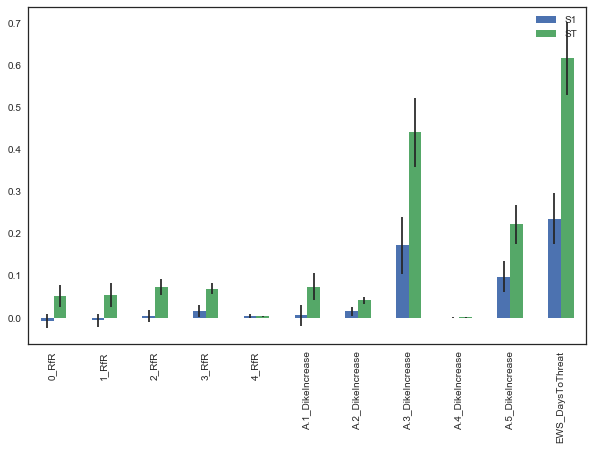

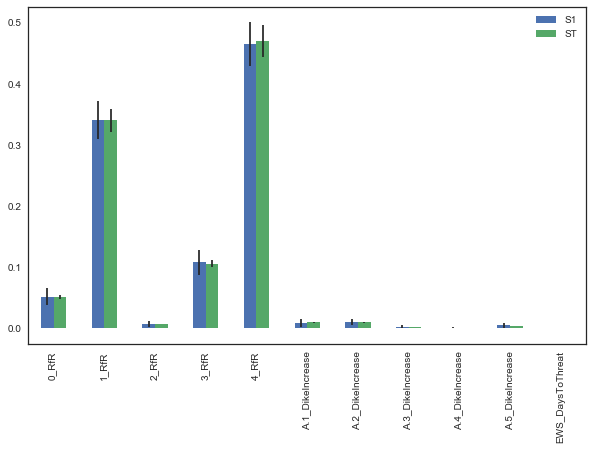

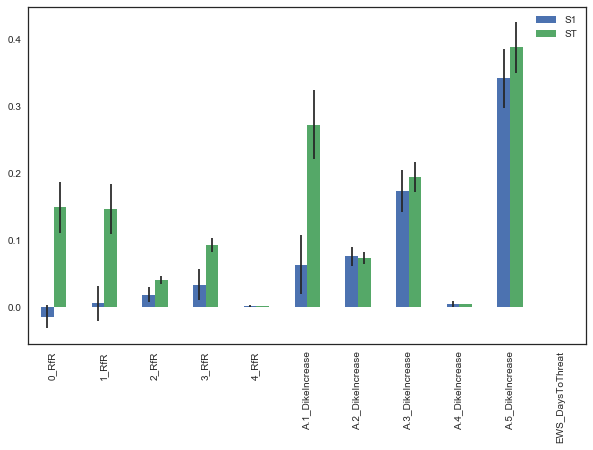

In [32]:
# Plotting the S1 and ST indices in a barplot
def plot_scores(scores):
    scores_filtered = {k:scores[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(10,6)
    fig.subplots_adjust(bottom=0.1)
    return fig

plot_scores(scores_deaths)
plot_scores(scores_costs)
plot_scores(scores_damage)
plt.show()